# found in 
https://github.com/philtabor/Youtube-Code-Repository/blob/master/ReinforcementLearning/DeepQLearning/ddqn_keras.py


import os
# for keras the CUDA commands must come before importing the keras libraries
os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
import gym

env = gym.make('CartPole-v1')
state_size = env.observation_space.shape[0]
action_size = env.action_space.n

ddqn_agent = DDQNAgent(alpha=0.0005, gamma=0.99, n_actions=action_size, epsilon=1.0,
              batch_size=64, input_dims=state_size)
n_games = 500
ddqn_scores = []
eps_history = []


for i in range(n_games):
    done = False
    score = 0
    observation = env.reset()
    for time in range(500):
        action = ddqn_agent.choose_action(observation)
        observation_, reward, done, info = env.step(action)
        reward = reward if not done else -10
        score += reward
        ddqn_agent.remember(observation, action, reward, observation_, int(done))
        observation = observation_
        ddqn_agent.learn()
        if done:
            break
            
    eps_history.append(ddqn_agent.epsilon)

    ddqn_scores.append(score)

    avg_score = np.mean(ddqn_scores[max(0, i-100):(i+1)])
    print('episode: ', i,'score: %.2f' % score,
          ' average score %.2f' % avg_score)

    if i % 10 == 0 and i > 0:
        ddqn_agent.save_model()


x = [i+1 for i in range(n_games)]


In [1]:
# handling colab problem
import os
if not 'data' in os.listdir('..'):
    print('needs data folder. imports through git')
    !git clone https://github.com/JakartaLaw/speciale.git
    print(os.listdir())
    os.chdir('speciale//src')


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from environments import EnvironmentModel1
from environments import translate_action_model1 as translate_action
from environments import reward_scaler_model1 as reward_scaler

from agents import DDQNAgent

In [4]:
def draw_beta():
    beta_L, beta_K = np.random.uniform(0.2, 4), np.random.uniform(0.2, 4)
    return {'beta_L' : beta_L, 'beta_K': beta_K}


In [5]:
parameters = {
    'beta_K' : 1,
    'beta_L' : 1,
    'sigma_epsilon' : 0.1, 
    'S_min': 120.0,
    'alpha': 4.609,
    'eta_G': 0.164,
    'eta_G_sq' : 0.015,
    'delta': 0.209,
    'sigma_epsilon': 15.11
}
env = EnvironmentModel1(**parameters)
state_size = env.observation_space.shape[0]
action_size = 4
ddqn_agent = DDQNAgent(alpha = 0.0005, gamma = 0.99, epsilon=1.0, input_dims=state_size, n_actions=action_size,
                  batch_size=64)

In [8]:
done = False
EPISODES = 300

ddqn_scores = []
eps_history = []
ddqn_scaled_scores = []

for i in range(EPISODES):
    done = False
    score = 0.0
    scaled_score = 0.0
    observation = env.reset()
    
    while not done:
        #print(observation)
        action = ddqn_agent.choose_action(observation)
        hours = translate_action(action)
        observation_, reward, done, info = env.step(hours)
        scaled_reward = reward_scaler(reward, env.beta_K, env.beta_L)

        score += reward
        scaled_score += scaled_reward
        ddqn_agent.remember(observation, action, scaled_reward, observation_, int(done))
        observation = observation_
        ddqn_agent.learn()

            
    eps_history.append(ddqn_agent.epsilon)

    ddqn_scores.append(score)
    ddqn_scaled_scores.append(scaled_score)

    avg_score = np.mean(ddqn_scores[max(0, i-100):(i+1)])
    avg_scaled_score = np.mean(ddqn_scaled_scores[max(0, i-100):(i+1)])

    print('episode: ', i,'score: %.2f' % score,
          ' avg score %.2f' % avg_score,
          ' avg scaled score %.2f' % avg_scaled_score)

    if i % 10 == 0 and i > 0:
        pass
        #ddqn_agent.save_model()

KeyboardInterrupt: 

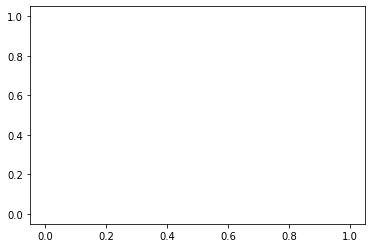

In [9]:
plt.plot(pd.Series(ddqn_scaled_scores).rolling(window=50).mean())

In [2]:
parameters = {
    'beta_K' : 1,
    'beta_L' : 3.35,
    'sigma_epsilon' : 0.1, 
    'S_min': 120.0,
    'alpha': 4.609,
    'eta_G': 0.164,
    'eta_G_sq' : 0.015,
    'delta': 0.209,
    'sigma_epsilon': 15.11,
    'zeta': 0.5
}
env = EnvironmentModel2(**parameters)

NameError: name 'EnvironmentModel2' is not defined

In [11]:
rewards_history, action_history = list(), list()
EPISODES = 150
ddqn_agent.epsilon=0.0

for e in range(EPISODES):
    env.reset()
    state = env.states
    for time in range(18, 500):
        action = ddqn_agent.choose_action(state)
        hours = translate_action(action)
        next_state, reward, done, info = env.step(hours)
        #action = agent.act(state)
        #_action = translate_action(action)
        #next_state, reward, done, _ = env.step(_action)
        scaled_reward = (reward - 24 ) / 5

        
        rewards_history.append([reward, e, time])
        action_history.append([hours, e, time])
        
        state = next_state
        if done:
            #print("episode: {}/{}, score: {}, e: {:.2}".format(e, EPISODES, np.mean(rewards_history), agent.epsilon))
            break

df_DQAgent = pd.DataFrame(rewards_history, columns=['rewards', 'episode', 'Q'])
df_DQAgent_action = pd.DataFrame(action_history, columns=['actions', 'episode', 'Q'])

KeyboardInterrupt: 

In [12]:
def random_action():
    act = np.random.randint(0, 4)
    return [0, 25, 37, 45][act]

In [13]:
rewards_history, action_history = list(), list()
EPISODES = 150
for e in range(EPISODES):
    env.reset()
    state = env.states
    for time in range(18, 500):
        _action = random_action()
        next_state, reward, done, _ = env.step(_action)

        
        rewards_history.append([reward, e, time])
        action_history.append([_action, e, time])
        
        state = next_state
        if done:
            break
            
df_random_agent = pd.DataFrame(rewards_history, columns=['rewards', 'episode', 'Q'])

In [14]:
rewards_history, action_history = list(), list()
EPISODES = 150
for e in range(EPISODES):
    env.reset()
    state = env.states
    for time in range(18, 500):
        _action = 0
        next_state, reward, done, _ = env.step(_action)

        
        rewards_history.append([reward, e, time])
        action_history.append([_action, e, time])
        
        state = next_state
        if done:
            break

df_0_agent = pd.DataFrame(rewards_history, columns=['rewards', 'episode', 'Q'])

In [15]:
rewards_history, action_history = list(), list()
EPISODES = 150
for e in range(EPISODES):
    env.reset()
    state = env.states
    for time in range(18, 500):
        _action = 37
        next_state, reward, done, _ = env.step(_action)

        
        rewards_history.append([reward, e, time])
        action_history.append([_action, e, time])
        
        state = next_state
        if done:
            break

df_37_agent = pd.DataFrame(rewards_history, columns=['rewards', 'episode', 'Q'])

In [16]:
rewards_history, action_history = list(), list()
EPISODES = 150
for e in range(EPISODES):
    env.reset()
    state = env.states
    for time in range(18, 500):
        _action = 45
        next_state, reward, done, _ = env.step(_action)

        
        rewards_history.append([reward, e, time])
        action_history.append([_action, e, time])
        
        state = next_state
        if done:
            break

df_45_agent = pd.DataFrame(rewards_history, columns=['rewards', 'episode', 'Q'])

In [17]:
#plt.plot(df_random_agent.drop('episode', axis=1).groupby('Q').mean(), label='Random Agent')
plt.plot(df_DQAgent.drop('episode', axis=1).groupby('Q').mean(), label='DQ Agent')
plt.plot(df_0_agent.drop('episode', axis=1).groupby('Q').mean(), label='0 hour Agent')
plt.plot(df_37_agent.drop('episode', axis=1).groupby('Q').mean(), label='37 hour Agent')
plt.plot(df_45_agent.drop('episode', axis=1).groupby('Q').mean(), label='45 hour Agent')
plt.plot(df_random_agent.drop('episode', axis=1).groupby('Q').mean(), label='random Agent')


plt.legend()

NameError: name 'df_DQAgent' is not defined

In [ ]:
plt.plot(df_DQAgent_action.drop('episode', axis=1).groupby('Q').mean())